In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("dataset.csv")
dataset = data.copy()
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Let's understand the variables



CustomerID: A unique ID that identifies each customer.

Gender: The customer’s gender: Male, Female

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Married: Indicates if the customer is married: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.


## Feature Engineering

### Let's drop the unnecessary columns

In [4]:
dataset.drop("customerID",axis=1,inplace=True)
dataset.drop("gender",axis=1,inplace=True)
dataset.drop("PaymentMethod",axis=1,inplace=True)
dataset

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,84.80,1990.5,No
7039,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,103.20,7362.9,No
7040,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,29.60,346.45,No
7041,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,74.40,306.6,Yes


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   object 


SeniorCitizen must be object and TotalCharges must be float64 because MontlyCharges is float64.

### Dtype conversions

In [6]:
dataset['SeniorCitizen'] = ['Yes' if code==1 else 'No' for code in dataset['SeniorCitizen']]

In [7]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   object 
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7032 non-null   float64


### Let's take a look at the values in the columns

In [9]:
for i in dataset.columns:
    print(i)
    print(dataset[i].unique())

SeniorCitizen
['No' 'Yes']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn
['No' 'Yes']


According to the information above, I want to keep the Contract and PaymentMethod exactly the same. For the Internet Service, I want to convert the data for DSL and Fiber optic to "Yes". The method I will apply to all categorical columns except these 3 is the same.

In [10]:
for i in dataset.columns:
    if i not in ['InternetService', 'Contract', 'PaymentMethod']:
        if dataset[i].dtype == object and len(dataset[i].unique()) > 2:
            dataset[i] = ['Yes' if code=='Yes' else 'No' for code in dataset[i]]
    elif i not in ['Contract', 'PaymentMethod']:
        dataset[i] = ['Yes' if code=='DSL' or code=='Fiber optic' else 'No' for code in dataset[i]]

In [11]:
for i in dataset.columns:
    print(i)
    print(dataset[i].unique())

SeniorCitizen
['No' 'Yes']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No' 'Yes']
InternetService
['Yes' 'No']
OnlineSecurity
['No' 'Yes']
OnlineBackup
['Yes' 'No']
DeviceProtection
['No' 'Yes']
TechSupport
['No' 'Yes']
StreamingTV
['No' 'Yes']
StreamingMovies
['No' 'Yes']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn
['No' 'Yes']


### missing values

In [12]:
dataset.isnull().sum()

SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

TotalCharges must be equal to the product of MonthlyCharges and tenure. Let's Check

In [13]:
dataset['Total'] = dataset['tenure']*dataset['MonthlyCharges']

In [14]:
index_of_columns = dataset.columns.tolist()

for i, column in enumerate(index_of_columns):
    print("Column name:", column)
    print("Index of column:", i)

Column name: SeniorCitizen
Index of column: 0
Column name: Partner
Index of column: 1
Column name: Dependents
Index of column: 2
Column name: tenure
Index of column: 3
Column name: PhoneService
Index of column: 4
Column name: MultipleLines
Index of column: 5
Column name: InternetService
Index of column: 6
Column name: OnlineSecurity
Index of column: 7
Column name: OnlineBackup
Index of column: 8
Column name: DeviceProtection
Index of column: 9
Column name: TechSupport
Index of column: 10
Column name: StreamingTV
Index of column: 11
Column name: StreamingMovies
Index of column: 12
Column name: Contract
Index of column: 13
Column name: PaperlessBilling
Index of column: 14
Column name: MonthlyCharges
Index of column: 15
Column name: TotalCharges
Index of column: 16
Column name: Churn
Index of column: 17
Column name: Total
Index of column: 18


In [15]:
def checkCharges():
    selected_columns = []
    index_of_columns = [3,15,16,18]
    for i in index_of_columns:
        selected_columns.append(dataset.columns[i])
    
    result = dataset[selected_columns]
    print(result)
    difference_between_TotalCharges_and_Total = dataset['TotalCharges']-dataset['Total']
    print(difference_between_TotalCharges_and_Total)
    print('Max Difference:',difference_between_TotalCharges_and_Total.max())

In [16]:
checkCharges()

      tenure  MonthlyCharges  TotalCharges    Total
0          1           29.85         29.85    29.85
1         34           56.95       1889.50  1936.30
2          2           53.85        108.15   107.70
3         45           42.30       1840.75  1903.50
4          2           70.70        151.65   141.40
...      ...             ...           ...      ...
7038      24           84.80       1990.50  2035.20
7039      72          103.20       7362.90  7430.40
7040      11           29.60        346.45   325.60
7041       4           74.40        306.60   297.60
7042      66          105.65       6844.50  6972.90

[7043 rows x 4 columns]
0         0.00
1       -46.80
2         0.45
3       -62.75
4        10.25
         ...  
7038    -44.70
7039    -67.50
7040     20.85
7041      9.00
7042   -128.40
Length: 7043, dtype: float64
Max Difference: 373.2500000000009


As you can see, TotalCharges and Total values ​​are very close to each other, but there are slight differences. The cause of this is not specified.

Let's Check MonthlyCharges and tenure

In [17]:
dataset[dataset['MonthlyCharges']==0]

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Total


In [18]:
dataset[dataset['tenure']==0]

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Total
488,No,Yes,Yes,0,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Two year,Yes,52.55,NaN,No,0.0
753,No,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,20.25,NaN,No,0.0
936,No,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Two year,No,80.85,NaN,No,0.0
1082,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,25.75,NaN,No,0.0
1340,No,Yes,Yes,0,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Two year,No,56.05,NaN,No,0.0
3331,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,19.85,NaN,No,0.0
3826,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,25.35,NaN,No,0.0
4380,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,20.00,NaN,No,0.0
5218,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,19.70,NaN,No,0.0
6670,No,Yes,Yes,0,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Two year,No,73.35,NaN,No,0.0


In [19]:
dataset[dataset['TotalCharges'].isnull()]

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Total
488,No,Yes,Yes,0,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Two year,Yes,52.55,NaN,No,0.0
753,No,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,20.25,NaN,No,0.0
936,No,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Two year,No,80.85,NaN,No,0.0
1082,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,25.75,NaN,No,0.0
1340,No,Yes,Yes,0,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Two year,No,56.05,NaN,No,0.0
3331,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,19.85,NaN,No,0.0
3826,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,25.35,NaN,No,0.0
4380,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,20.00,NaN,No,0.0
5218,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,19.70,NaN,No,0.0
6670,No,Yes,Yes,0,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Two year,No,73.35,NaN,No,0.0


### When examining the three tables above, it can be observed that the indices of the records with a tenure value of 0 are the same as the indices of the records with missing values in TotalCharges. Additionally, MonthlyCharges does not contain any 0 or missing values. Consequently, the missing values in TotalCharges are likely caused by the presence of 0 values in tenure. In this case, since we cannot fill in these missing values, we have to delete them from the dataset.

In [20]:
dataset.dropna(inplace=True)

In [21]:
dataset.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
Total               0
dtype: int64

### Outliers

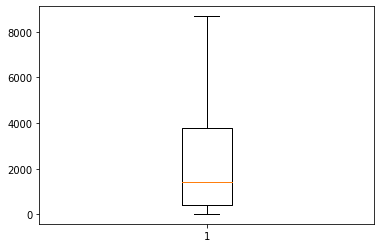

In [22]:
plt.boxplot(dataset['TotalCharges'])
plt.show()

In [23]:
def outlierDetection():
    for column in dataset.columns:
        if dataset[column].dtype == 'float64':
            Q1 = dataset[column].quantile(0.25)
            Q3 = dataset[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            lower = dataset[dataset[column] < lower_bound][column]
            upper = dataset[dataset[column] > upper_bound][column]

            print('Outliers of', column, ':', lower, upper)

        elif dataset[column].dtype == 'int64':
            Q1 = dataset[column].quantile(0.25)
            Q3 = dataset[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            lower = dataset[dataset[column] < lower_bound][column]
            upper = dataset[dataset[column] > upper_bound][column]

            print('Outliers of', column, ':', lower, upper)

        else:
            return


In [24]:
outlierDetection()

There are no outliers in our dataset.

## Encoding


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   object 
 1   Partner           7032 non-null   object 
 2   Dependents        7032 non-null   object 
 3   tenure            7032 non-null   int64  
 4   PhoneService      7032 non-null   object 
 5   MultipleLines     7032 non-null   object 
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   object 
 8   OnlineBackup      7032 non-null   object 
 9   DeviceProtection  7032 non-null   object 
 10  TechSupport       7032 non-null   object 
 11  StreamingTV       7032 non-null   object 
 12  StreamingMovies   7032 non-null   object 
 13  Contract          7032 non-null   object 
 14  PaperlessBilling  7032 non-null   object 
 15  MonthlyCharges    7032 non-null   float64
 16  TotalCharges      7032 non-null   float64
 17  

In [26]:
dataset.drop('Total', axis=1, inplace=True)

In [27]:
le = LabelEncoder()
variables = dataset.select_dtypes(include='object').columns
dataset.update(dataset[variables].apply(le.fit_transform))
dataset

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,29.85,29.85,0
1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,56.95,1889.50,0
2,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,53.85,108.15,1
3,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,84.80,1990.50,0
7039,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,103.20,7362.90,0
7040,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,29.60,346.45,0
7041,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,74.40,306.60,1


If the value of the churn variable is 1, it indicates that the customer has churned or left, and if the value is 0, it means the customer has continued or stayed.

## Train Test Split

In [28]:
categorical_features = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','Churn']

for feature in categorical_features:
    dataset[feature] = dataset[feature].astype('int64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Partner           7032 non-null   int64  
 2   Dependents        7032 non-null   int64  
 3   tenure            7032 non-null   int64  
 4   PhoneService      7032 non-null   int64  
 5   MultipleLines     7032 non-null   int64  
 6   InternetService   7032 non-null   int64  
 7   OnlineSecurity    7032 non-null   int64  
 8   OnlineBackup      7032 non-null   int64  
 9   DeviceProtection  7032 non-null   int64  
 10  TechSupport       7032 non-null   int64  
 11  StreamingTV       7032 non-null   int64  
 12  StreamingMovies   7032 non-null   int64  
 13  Contract          7032 non-null   int64  
 14  PaperlessBilling  7032 non-null   int64  
 15  MonthlyCharges    7032 non-null   float64
 16  TotalCharges      7032 non-null   float64
 17  

In [29]:
y = dataset['Churn']
X = dataset.drop(columns='Churn', axis=1)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Modelling

#### Due to a lack of equipment, only the tuning processes of two models have been performed. It is highly possible to improve the obtained scores.

### XGBoost 

#### Model Tuning 

In [1]:
'''
model = xgb.XGBClassifier()

parameters = {
    'n_estimators': np.arange(250, 1501, 250).tolist(),  # Ağaç sayısı
    'learning_rate': np.linspace(0.005, 0.2, 5).tolist(), # Öğrenme oranı
    'max_depth': np.arange(3, 12, 2).tolist(),  # Maksimum ağaç derinliği
    'colsample_bytree': np.linspace(0, 1, 5).tolist()
}

grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5)

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)
'''

'\nmodel = xgb.XGBClassifier()\n\nparameters = {\n    \'n_estimators\': np.arange(250, 1501, 250).tolist(),  # Ağaç sayısı\n    \'learning_rate\': np.linspace(0.005, 0.2, 5).tolist(), # Öğrenme oranı\n    \'max_depth\': np.arange(3, 12, 2).tolist(),  # Maksimum ağaç derinliği\n    \'colsample_bytree\': np.linspace(0, 1, 5).tolist()\n}\n\ngrid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5)\n\ngrid_search.fit(X, y)\n\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\nprint("Best Parameters: ", best_params)\nprint("Best Score: ", best_score)\n'

best_params: n_estimators=1500,learning_rate=0.005,max_depth=3,colsample_bytree=0.5

In [32]:
model = XGBClassifier(n_estimators=1500,learning_rate=0.005,max_depth=3,colsample_bytree=0.5)

In [33]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [34]:
y_pred_xgb = model.predict(X_test)

### CatBoost

In [35]:
model_cat = CatBoostClassifier()

In [36]:
model_cat.fit(X_train,y_train)

Learning rate set to 0.02154
0:	learn: 0.6777236	total: 141ms	remaining: 2m 20s
1:	learn: 0.6630621	total: 145ms	remaining: 1m 12s
2:	learn: 0.6496560	total: 148ms	remaining: 49.3s
3:	learn: 0.6369241	total: 152ms	remaining: 37.8s
4:	learn: 0.6254910	total: 155ms	remaining: 30.9s
5:	learn: 0.6137625	total: 159ms	remaining: 26.3s
6:	learn: 0.6031954	total: 163ms	remaining: 23.1s
7:	learn: 0.5929174	total: 167ms	remaining: 20.7s
8:	learn: 0.5839543	total: 171ms	remaining: 18.8s
9:	learn: 0.5750074	total: 174ms	remaining: 17.2s
10:	learn: 0.5668519	total: 178ms	remaining: 16s
11:	learn: 0.5585850	total: 183ms	remaining: 15s
12:	learn: 0.5514148	total: 187ms	remaining: 14.2s
13:	learn: 0.5465953	total: 189ms	remaining: 13.3s
14:	learn: 0.5401856	total: 193ms	remaining: 12.7s
15:	learn: 0.5351998	total: 196ms	remaining: 12s
16:	learn: 0.5292301	total: 199ms	remaining: 11.5s
17:	learn: 0.5234006	total: 203ms	remaining: 11s
18:	learn: 0.5178972	total: 207ms	remaining: 10.7s
19:	learn: 0.51292

208:	learn: 0.3831698	total: 895ms	remaining: 3.38s
209:	learn: 0.3830323	total: 899ms	remaining: 3.38s
210:	learn: 0.3828275	total: 903ms	remaining: 3.38s
211:	learn: 0.3826571	total: 907ms	remaining: 3.37s
212:	learn: 0.3825220	total: 911ms	remaining: 3.36s
213:	learn: 0.3823116	total: 914ms	remaining: 3.36s
214:	learn: 0.3821337	total: 918ms	remaining: 3.35s
215:	learn: 0.3819985	total: 921ms	remaining: 3.34s
216:	learn: 0.3817791	total: 925ms	remaining: 3.34s
217:	learn: 0.3816543	total: 929ms	remaining: 3.33s
218:	learn: 0.3814703	total: 932ms	remaining: 3.33s
219:	learn: 0.3813685	total: 938ms	remaining: 3.33s
220:	learn: 0.3812801	total: 942ms	remaining: 3.32s
221:	learn: 0.3811120	total: 947ms	remaining: 3.32s
222:	learn: 0.3810161	total: 953ms	remaining: 3.32s
223:	learn: 0.3808602	total: 957ms	remaining: 3.31s
224:	learn: 0.3807877	total: 961ms	remaining: 3.31s
225:	learn: 0.3806482	total: 964ms	remaining: 3.3s
226:	learn: 0.3805089	total: 969ms	remaining: 3.3s
227:	learn: 0.

386:	learn: 0.3620036	total: 1.6s	remaining: 2.54s
387:	learn: 0.3618800	total: 1.61s	remaining: 2.54s
388:	learn: 0.3617545	total: 1.61s	remaining: 2.54s
389:	learn: 0.3616647	total: 1.62s	remaining: 2.54s
390:	learn: 0.3615914	total: 1.63s	remaining: 2.53s
391:	learn: 0.3615030	total: 1.63s	remaining: 2.53s
392:	learn: 0.3613996	total: 1.64s	remaining: 2.53s
393:	learn: 0.3612939	total: 1.64s	remaining: 2.53s
394:	learn: 0.3612021	total: 1.65s	remaining: 2.52s
395:	learn: 0.3611234	total: 1.66s	remaining: 2.52s
396:	learn: 0.3609734	total: 1.66s	remaining: 2.52s
397:	learn: 0.3608606	total: 1.66s	remaining: 2.52s
398:	learn: 0.3607543	total: 1.67s	remaining: 2.51s
399:	learn: 0.3607047	total: 1.67s	remaining: 2.51s
400:	learn: 0.3605559	total: 1.68s	remaining: 2.5s
401:	learn: 0.3605435	total: 1.68s	remaining: 2.5s
402:	learn: 0.3604227	total: 1.69s	remaining: 2.5s
403:	learn: 0.3603532	total: 1.69s	remaining: 2.5s
404:	learn: 0.3602286	total: 1.7s	remaining: 2.49s
405:	learn: 0.3601

576:	learn: 0.3440296	total: 2.49s	remaining: 1.82s
577:	learn: 0.3439131	total: 2.49s	remaining: 1.82s
578:	learn: 0.3438156	total: 2.5s	remaining: 1.81s
579:	learn: 0.3437232	total: 2.5s	remaining: 1.81s
580:	learn: 0.3436135	total: 2.5s	remaining: 1.81s
581:	learn: 0.3435609	total: 2.51s	remaining: 1.8s
582:	learn: 0.3434753	total: 2.51s	remaining: 1.8s
583:	learn: 0.3433890	total: 2.52s	remaining: 1.79s
584:	learn: 0.3432419	total: 2.52s	remaining: 1.79s
585:	learn: 0.3431244	total: 2.53s	remaining: 1.78s
586:	learn: 0.3430316	total: 2.53s	remaining: 1.78s
587:	learn: 0.3429239	total: 2.54s	remaining: 1.78s
588:	learn: 0.3428717	total: 2.54s	remaining: 1.77s
589:	learn: 0.3427910	total: 2.54s	remaining: 1.77s
590:	learn: 0.3426976	total: 2.55s	remaining: 1.76s
591:	learn: 0.3425609	total: 2.55s	remaining: 1.76s
592:	learn: 0.3424400	total: 2.56s	remaining: 1.75s
593:	learn: 0.3423625	total: 2.56s	remaining: 1.75s
594:	learn: 0.3422840	total: 2.57s	remaining: 1.75s
595:	learn: 0.342

760:	learn: 0.3274530	total: 3.19s	remaining: 1s
761:	learn: 0.3273502	total: 3.2s	remaining: 999ms
762:	learn: 0.3272528	total: 3.2s	remaining: 995ms
763:	learn: 0.3271681	total: 3.21s	remaining: 991ms
764:	learn: 0.3271173	total: 3.21s	remaining: 986ms
765:	learn: 0.3270238	total: 3.21s	remaining: 982ms
766:	learn: 0.3268938	total: 3.22s	remaining: 978ms
767:	learn: 0.3267942	total: 3.22s	remaining: 974ms
768:	learn: 0.3267225	total: 3.23s	remaining: 969ms
769:	learn: 0.3266439	total: 3.23s	remaining: 965ms
770:	learn: 0.3265790	total: 3.23s	remaining: 961ms
771:	learn: 0.3264714	total: 3.24s	remaining: 956ms
772:	learn: 0.3263647	total: 3.24s	remaining: 952ms
773:	learn: 0.3262895	total: 3.24s	remaining: 947ms
774:	learn: 0.3261583	total: 3.25s	remaining: 943ms
775:	learn: 0.3260928	total: 3.25s	remaining: 939ms
776:	learn: 0.3259905	total: 3.26s	remaining: 935ms
777:	learn: 0.3259171	total: 3.26s	remaining: 930ms
778:	learn: 0.3258647	total: 3.27s	remaining: 926ms
779:	learn: 0.325

955:	learn: 0.3125282	total: 3.91s	remaining: 180ms
956:	learn: 0.3124519	total: 3.92s	remaining: 176ms
957:	learn: 0.3123775	total: 3.92s	remaining: 172ms
958:	learn: 0.3123061	total: 3.92s	remaining: 168ms
959:	learn: 0.3122000	total: 3.93s	remaining: 164ms
960:	learn: 0.3121359	total: 3.93s	remaining: 160ms
961:	learn: 0.3120561	total: 3.94s	remaining: 155ms
962:	learn: 0.3120090	total: 3.94s	remaining: 151ms
963:	learn: 0.3119255	total: 3.94s	remaining: 147ms
964:	learn: 0.3118494	total: 3.94s	remaining: 143ms
965:	learn: 0.3117871	total: 3.95s	remaining: 139ms
966:	learn: 0.3117442	total: 3.95s	remaining: 135ms
967:	learn: 0.3116694	total: 3.96s	remaining: 131ms
968:	learn: 0.3116138	total: 3.96s	remaining: 127ms
969:	learn: 0.3115656	total: 3.96s	remaining: 123ms
970:	learn: 0.3114848	total: 3.97s	remaining: 118ms
971:	learn: 0.3113713	total: 3.97s	remaining: 114ms
972:	learn: 0.3113030	total: 3.97s	remaining: 110ms
973:	learn: 0.3112201	total: 3.98s	remaining: 106ms
974:	learn: 

In [37]:
y_pred_cat = model_cat.predict(X_test)

### LGBM

#### Model Tuning

In [2]:
'''
model = lgbm.LGBMClassifier()

param_grid = {
    'num_leaves': np.arange(10, 31, 5).tolist(),
    'learning_rate': np.linspace(0.001, 0.2, 5).tolist(),
    'n_estimators': np.arange(250, 1501, 250).tolist(),
    'min_child_samples': range(10, 31, 5),  # 10, 20, 30
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X, y)

print("Best Parameters: ", grid_search.best_params_)
print("Best Scores: ", grid_search.best_score_)
'''

'\nmodel = lgbm.LGBMClassifier()\n\nparam_grid = {\n    \'num_leaves\': np.arange(10, 31, 5).tolist(),\n    \'learning_rate\': np.linspace(0.001, 0.2, 5).tolist(),\n    \'n_estimators\': np.arange(250, 1501, 250).tolist(),\n    \'min_child_samples\': range(10, 31, 5),  # 10, 20, 30\n}\n\ngrid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)\ngrid_search.fit(X, y)\n\nprint("Best Parameters: ", grid_search.best_params_)\nprint("Best Scores: ", grid_search.best_score_)\n'

best_params={'bagging_fraction': 0.8, 'feature_fraction': 0.8, 'learning_rate': 0.01, 'max_depth': -1, 'min_child_samples': 20, 'n_estimators': 300, 'num_leaves': 20}

In [39]:
model_lgbm = LGBMClassifier(bagging_fraction= 0.8, feature_fraction= 0.8, learning_rate= 0.05075, max_depth= -1, min_child_samples= 20, n_estimators= 250, num_leaves= 10)

In [40]:
model_lgbm.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


LGBMClassifier(bagging_fraction=0.8, feature_fraction=0.8,
               learning_rate=0.05075, n_estimators=250, num_leaves=10)

In [41]:
y_pred_lgbm = model_lgbm.predict(X_test)

### LinearSVC

In [42]:
model_svc = LinearSVC()

In [43]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [44]:
y_pred_svc = model.predict(X_test)

### Logistic Regression

In [45]:
model_log = LogisticRegression()

In [46]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [47]:
y_pred_log = model.predict(X_test)

### Metrics

In [48]:
def metrics(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)

    precision = precision_score(y_test, y_pred)

    recall = recall_score(y_test, y_pred)

    f1 = f1_score(y_test, y_pred)

    print("Doğruluk (Accuracy): {:.2f}".format(accuracy))
    print("Hassasiyet (Precision): {:.2f}".format(precision))
    print("Geri çağırma (Recall): {:.2f}".format(recall))
    print("F1 Skoru: {:.2f}".format(f1))

In [49]:
models = ["XGBoost","CatBoost","LGBM","LinearSVC","LogicticRegression"]
y_preds = [y_pred_xgb,y_pred_cat,y_pred_lgbm,y_pred_svc,y_pred_log]

In [50]:
for i in range(5):
    print(models[i], "Metrics")
    print("-------------")
    metrics(y_test,y_preds[i])
    print("-------------")

XGBoost Metrics
-------------
Doğruluk (Accuracy): 0.79
Hassasiyet (Precision): 0.65
Geri çağırma (Recall): 0.48
F1 Skoru: 0.56
-------------
CatBoost Metrics
-------------
Doğruluk (Accuracy): 0.79
Hassasiyet (Precision): 0.64
Geri çağırma (Recall): 0.49
F1 Skoru: 0.56
-------------
LGBM Metrics
-------------
Doğruluk (Accuracy): 0.80
Hassasiyet (Precision): 0.66
Geri çağırma (Recall): 0.49
F1 Skoru: 0.56
-------------
LinearSVC Metrics
-------------
Doğruluk (Accuracy): 0.79
Hassasiyet (Precision): 0.65
Geri çağırma (Recall): 0.48
F1 Skoru: 0.56
-------------
LogicticRegression Metrics
-------------
Doğruluk (Accuracy): 0.79
Hassasiyet (Precision): 0.65
Geri çağırma (Recall): 0.48
F1 Skoru: 0.56
-------------
